In [2]:
%matplotlib notebook

In [88]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 14
})

In [116]:
import pandas as pd, numpy as np
from io import StringIO

The following data is taken from a AMD Ryzen 5 2600 machine with 48GB DDR4.

In [120]:
data_csv="""
qubits,name,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_total
6,Lightning,6.314399070106447e-05,4.009599797427654e-05,3.928600926883519e-05,3.892599488608539e-05,3.8825994124636054e-05,3.8546015275642276e-05,3.9045989979058504e-05,3.8615980884060264e-05,3.867599298246205e-05,3.857599222101271e-05,0.0004430469998624176
6,PLext,0.3958218780171592,0.00015315497876144946,0.00014901600661687553,0.00014892598846927285,0.0001510250149294734,0.00014967599418014288,0.00014960599946789443,0.0001551650057081133,0.00015038502169772983,0.00014972599456086755,0.39721674399334006
8,Lightning,9.120098548009992e-05,7.871299749240279e-05,7.791197276674211e-05,7.787300273776054e-05,7.790201925672591e-05,7.763298344798386e-05,7.777300197631121e-05,7.748199277557433e-05,7.732299854978919e-05,7.75430235080421e-05,0.0008230210223700851
8,PLext,0.00026196398539468646,0.00025276601081714034,0.0002573849924374372,0.00025359500432386994,0.00026450399309396744,0.00025903500500135124,0.0002634850097820163,0.0002742840151768178,0.0002604150213301182,0.0002684840001165867,0.0026453349855728447
10,Lightning,0.00021994899725541472,0.00021222999203018844,0.00021214899607002735,0.00020908997976221144,0.00020904000848531723,0.00020871998276561499,0.0002111000067088753,0.00020929001038894057,0.00020797998877242208,0.0002084400039166212,0.002126775012584403
10,PLext,0.0005418179789558053,0.0005800839862786233,0.0005970619968138635,0.0005970430211164057,0.0006008729978930205,0.0006005129835102707,0.0006071919924579561,0.0005976019892841578,0.0005994420207571238,0.0005978420085739344,0.0059514780004974455
12,Lightning,0.000761056988267228,0.0007457280007656664,0.0007301399891730398,0.0007189009920693934,0.0007177310180850327,0.000720181007636711,0.0007194509962573647,0.00073026999598369,0.0007391890103463084,0.0007222310232464224,0.007329425978241488
12,PLext,0.0018680299981497228,0.0018765490094665438,0.0018676900072023273,0.0018699999782256782,0.0018661200010683388,0.0018892280058935285,0.0018929780053440481,0.0018564109923318028,0.0018673700105864555,0.0018683600064832717,0.018762296007480472
14,Lightning,0.003060565999476239,0.003077733999816701,0.003094821993727237,0.003139778011245653,0.003170325013343245,0.0031716249941382557,0.0031089110125321895,0.0031263389973901212,0.0031820840085856616,0.003186583984643221,0.03134326700819656
14,PLext,0.009156230022199452,0.005187800998101011,0.005224448017543182,0.007330864988034591,0.008516670990502462,0.00514656602172181,0.005174632009584457,0.005185211019124836,0.006309302989393473,0.005125736992340535,0.06248730301740579
16,Lightning,0.014129342016531155,0.014645292016211897,0.014427702990360558,0.014457279990892857,0.01451536497916095,0.014485127001535147,0.014382617024239153,0.014569240011041984,0.014794487971812487,0.015355002979049459,0.14579172499361448
16,PLext,0.022606440994422883,0.023639774008188397,0.02243114900193177,0.02228676399681717,0.02201393898576498,0.022093402018072084,0.022496574005344883,0.022198102000402287,0.021907518996158615,0.02227627398679033,0.22411598300095648
18,Lightning,0.06487457902403548,0.06641963199945167,0.06549667901708744,0.06638089497573674,0.0664355109911412,0.06530075799673796,0.06545626299339347,0.06630827201297507,0.06697543899645098,0.0654105180001352,0.6591568669828121
18,PLext,0.11634363498887978,0.12009931201464497,0.12485596499755047,0.12519524298841134,0.11859107299824245,0.12612913601333275,0.12444943300215527,0.12484173697885126,0.13039739400846884,0.1226700599945616,1.2337403409765102
20,Lightning,0.3510246340010781,0.360685449995799,0.3540450540021993,0.35323602802236564,0.3529574930144008,0.3508236529887654,0.3545605939871166,0.3515405490179546,0.35259507401497103,0.35292302499874495,3.534606525005074
20,PLext,0.6770789530128241,0.6075382790004369,0.6029004119918682,0.6020670929865446,0.6097280389803927,0.6018250040069688,0.6035613960120827,0.6056454209901858,0.606235339975683,0.6020331629842985,6.118847400997765
22,Lightning,1.574437242001295,1.586011375009548,1.5810629200132098,1.5799942940066103,1.5911100299854297,1.5928986300132237,1.582354904996464,1.6146304409776349,1.5867083290067967,1.5874324410106055,15.87684440400335
22,PLext,2.7053215019986965,2.629197970003588,2.6142605310014915,2.646722526027588,2.629737904004287,2.645293178007705,2.6382158740016166,2.6378185730136465,2.6296267980069388,2.6373184389958624,26.413715863018297
24,Lightning,8.043118819012307,8.074667701002909,8.079953514010413,8.06386640801793,8.129088356014108,8.036823722999543,8.251529525994556,8.058868410997093,8.059510658000363,8.051412858010735,80.84903772899997
24,PLext,15.439505579008255,15.356529996002791,15.424631069996394,15.58353686099872,15.78762837301474,15.514244600984966,15.725021053978708,15.55737920399406,15.634961959003704,15.50653288399917,155.53017319200444
26,Lightning,36.46949548498378,37.36908281000797,37.106769911013544,37.463068974000635,37.17084768900531,37.070095871022204,37.004316400998505,37.28062642598525,37.33421814898611,37.330983271007426,371.59968918497907
26,PLext,68.18051060600556,68.92418216599617,69.17273541400209,69.33618309698068,69.01283661299385,69.03381714399438,69.01507316401694,69.19713733298704,69.18688873801148,69.1950896299968,690.2546581299976
"""

In [121]:
data_plext_memoize="""
qubits,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_total
6,0.7218937980069313,0.00020264199702069163,0.00019795200205408037,0.0001950919977389276,0.00020136201055720448,0.00019570201402530074,0.00019549200078472495,0.0001950120204128325,0.0002022219996433705,0.00020665201009251177,0.7237381069862749
8,0.00026924198027700186,0.00026366300880908966,0.00026026301202364266,0.00027294299798086286,0.00026907201390713453,0.00027200300246477127,0.00026427299599163234,0.0002674330025911331,0.00027017301181331277,0.0002687819942366332,0.0027118069992866367
10,0.00044688498019240797,0.00044518400682136416,0.0004440050106495619,0.00043591400026343763,0.0004408950044307858,0.0004391550028230995,0.00044639399857260287,0.0004428149841260165,0.0004383839841466397,0.0004620949912350625,0.004472066008020192
12,0.0011426019773352891,0.0011340109922457486,0.0011344520025886595,0.0011531620111782104,0.0011520319967530668,0.0011635719856712967,0.0011535619851201773,0.0012738930236082524,0.001337983994744718,0.0013425830111373216,0.012024713010760024
14,0.0045902570127509534,0.00408901201444678,0.003802399995038286,0.003765127999940887,0.003832178976153955,0.0037832490052096546,0.007939992006868124,0.0027850480109918863,0.0028499990003183484,0.0028600890072993934,0.040375713986577466
16,0.013881021994166076,0.016159216000232846,0.011124773998744786,0.01140115800080821,0.013092714012600482,0.011176055006217211,0.011983973003225401,0.011409216996980831,0.01247465901542455,0.011121963994810358,0.12399689300218597
18,0.061116097000194713,0.058028075989568606,0.11917495401576161,0.08591594299650751,0.06118908800999634,0.062032737012486905,0.059633922995999455,0.061160548008047044,0.05921396898338571,0.05713778699282557,0.6847930130024906
20,0.3992276929784566,0.3430611960066017,0.40431703100330196,0.36834723001811653,0.43836565301171504,0.3370373010111507,0.411870732990792,0.3481712590146344,0.39974009100114927,0.36922628799220547,3.8195850659976713
22,1.8361666860000696,1.6715417859959416,1.7859209329762962,1.6813844900170807,1.6796756819821894,1.7507500339997932,1.706257521000225,1.7107864880235866,1.69052012701286,1.684556933993008,17.19777111298754
24,8.826493239001138,8.725328457017895,8.76708522500121,8.72980976299732,8.751089489000151,8.751854141009971,8.804642180009978,8.859469382005045,8.863425262010423,8.837749914004235,87.91715996401035
26,40.15824441501172,39.404712678981014,39.4710590300092,39.15848165997886,39.231514882994816,39.21728934798739,38.824706818006234,39.03985013597412,39.00057020998793,38.88679847898311,392.3934332689969
"""

In [122]:
df = pd.read_csv(StringIO(data_csv))
plext_lru_mem = pd.read_csv(StringIO(data_plext_memoize))

In [123]:
plext = df[df["name"]=="PLext"]
lightning = df[df["name"]=="Lightning"]

In [126]:
lightning

,qubits,name,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_total
0,6,Lightning,0.000063,0.000040,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000443
2,8,Lightning,0.000091,0.000079,0.000078,0.000078,0.000078,0.000078,0.000078,0.000077,0.000077,0.000078,0.000823
4,10,Lightning,0.000220,0.000212,0.000212,0.000209,0.000209,0.000209,0.000211,0.000209,0.000208,0.000208,0.002127
6,12,Lightning,0.000761,0.000746,0.000730,0.000719,0.000718,0.000720,0.000719,0.000730,0.000739,0.000722,0.007329
8,14,Lightning,0.003061,0.003078,0.003095,0.003140,0.003170,0.003172,0.003109,0.003126,0.003182,0.003187,0.031343
10,16,Lightning,0.014129,0.014645,0.014428,0.014457,0.014515,0.014485,0.014383,0.014569,0.014794,0.015355,0.145792
12,18,Lightning,0.064875,0.066420,0.065497,0.066381,0.066436,0.065301,0.065456,0.066308,0.066975,0.065411,0.659157
14,20,Lightning,0.351025,0.360685,0.354045,0.353236,0.352957,0.350824,0.354561,0.351541,0.352595,0.352923,3.534607
16,22,Lightning,1.574437,1.586011,1.581063,1.579994,1.591110,1.592899,1.582355,1.614630,1.586708,1.587432,15.876844
18,24,Lightning,8.043119,8.074668,8.079954,8.063866,8.129088,8.036824,8.251530,8.058868,8.059511,8.051413,80.849038


In [127]:
plext

,qubits,name,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_total
1,6,PLext,0.395822,0.000153,0.000149,0.000149,0.000151,0.000150,0.000150,0.000155,0.000150,0.000150,0.397217
3,8,PLext,0.000262,0.000253,0.000257,0.000254,0.000265,0.000259,0.000263,0.000274,0.000260,0.000268,0.002645
5,10,PLext,0.000542,0.000580,0.000597,0.000597,0.000601,0.000601,0.000607,0.000598,0.000599,0.000598,0.005951
7,12,PLext,0.001868,0.001877,0.001868,0.001870,0.001866,0.001889,0.001893,0.001856,0.001867,0.001868,0.018762
9,14,PLext,0.009156,0.005188,0.005224,0.007331,0.008517,0.005147,0.005175,0.005185,0.006309,0.005126,0.062487
11,16,PLext,0.022606,0.023640,0.022431,0.022287,0.022014,0.022093,0.022497,0.022198,0.021908,0.022276,0.224116
13,18,PLext,0.116344,0.120099,0.124856,0.125195,0.118591,0.126129,0.124449,0.124842,0.130397,0.122670,1.233740
15,20,PLext,0.677079,0.607538,0.602900,0.602067,0.609728,0.601825,0.603561,0.605645,0.606235,0.602033,6.118847
17,22,PLext,2.705322,2.629198,2.614261,2.646723,2.629738,2.645293,2.638216,2.637819,2.629627,2.637318,26.413716
19,24,PLext,15.439506,15.356530,15.424631,15.583537,15.787628,15.514245,15.725021,15.557379,15.634962,15.506533,155.530173


In [128]:
plext_lru_mem

,qubits,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_total
0,6,0.721894,0.000203,0.000198,0.000195,0.000201,0.000196,0.000195,0.000195,0.000202,0.000207,0.723738
1,8,0.000269,0.000264,0.000260,0.000273,0.000269,0.000272,0.000264,0.000267,0.000270,0.000269,0.002712
2,10,0.000447,0.000445,0.000444,0.000436,0.000441,0.000439,0.000446,0.000443,0.000438,0.000462,0.004472
3,12,0.001143,0.001134,0.001134,0.001153,0.001152,0.001164,0.001154,0.001274,0.001338,0.001343,0.012025
4,14,0.004590,0.004089,0.003802,0.003765,0.003832,0.003783,0.007940,0.002785,0.002850,0.002860,0.040376
5,16,0.013881,0.016159,0.011125,0.011401,0.013093,0.011176,0.011984,0.011409,0.012475,0.011122,0.123997
6,18,0.061116,0.058028,0.119175,0.085916,0.061189,0.062033,0.059634,0.061161,0.059214,0.057138,0.684793
7,20,0.399228,0.343061,0.404317,0.368347,0.438366,0.337037,0.411871,0.348171,0.399740,0.369226,3.819585
8,22,1.836167,1.671542,1.785921,1.681384,1.679676,1.750750,1.706258,1.710786,1.690520,1.684557,17.197771
9,24,8.826493,8.725328,8.767085,8.729810,8.751089,8.751854,8.804642,8.859469,8.863425,8.837750,87.917160


<IPython.core.display.Javascript object>


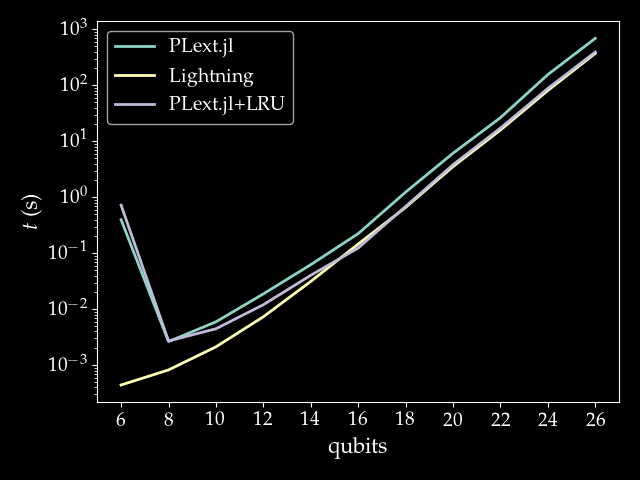

In [109]:
plt.style.use('dark_background')
ax = plext.plot(x="qubits", y="t_total", logy=True, label="PLext.jl", linewidth=2, fontsize=14)
lightning.plot(x="qubits", y="t_total", ax=ax, label="Lightning", linewidth=2, fontsize=14)
plext_lru_mem.plot(x="qubits", y="t_total", ax=ax, label="PLext.jl+LRU", linewidth=2, fontsize=14)
ax.set_ylabel(r"$t$ (s)", fontsize=16)
ax.set_xlabel(r"qubits", fontsize=16)
ax.set_xticks(range(6,27,2))
plt.tight_layout()
plt.savefig("PLextVLightning.pdf")
plt.savefig("PLextVLightning.png")

<IPython.core.display.Javascript object>


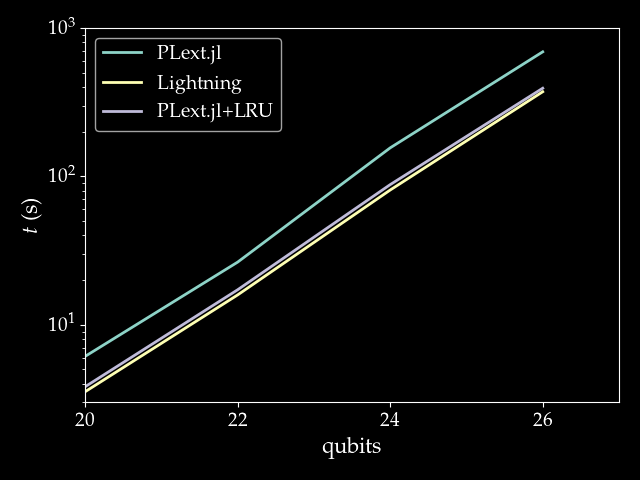

In [115]:
plt.style.use('dark_background')
ax = plext.plot(x="qubits", y="t_total", logy=True, label="PLext.jl", linewidth=2, fontsize=14)
lightning.plot(x="qubits", y="t_total", ax=ax, label="Lightning", linewidth=2, fontsize=14)
plext_lru_mem.plot(x="qubits", y="t_total", ax=ax, label="PLext.jl+LRU", linewidth=2, fontsize=14)
ax.set_ylabel(r"$t$ (s)", fontsize=16)
ax.set_xlabel(r"qubits", fontsize=16)
ax.set_xticks(range(6,27,2))
ax.set_xlim([20, 27])
ax.set_ylim([3e-0, 1e3])
plt.tight_layout()
plt.savefig("PLextVLightning_q20_26.pdf")
plt.savefig("PLextVLightning_q20_26.png")

<IPython.core.display.Javascript object>


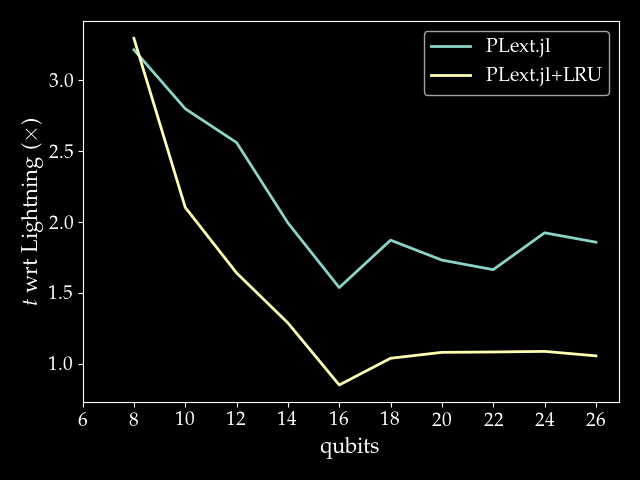

In [113]:
plt.figure()
plt.style.use('dark_background')

plt.plot(range(8,27,2), 
         np.array(plext[["t_total"]].to_numpy().ravel() / lightning[["t_total"]].to_numpy().ravel())[1:], linewidth=2,
        label="PLext.jl")
plt.plot(range(8,27,2), 
         np.array(plext_lru_mem[["t_total"]].to_numpy().ravel() / lightning[["t_total"]].to_numpy().ravel())[1:], linewidth=2,
        label="PLext.jl+LRU")
plt.xlabel(r"qubits", fontsize=16)
plt.xticks(range(6,27,2))
plt.ylabel(r"$t$ wrt Lightning ($\times$)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig("relperf_plextVlightning.pdf")
plt.savefig("relperf_plextVlightning.png")